In [146]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

np.set_printoptions(suppress=True)

In [147]:
def model(funcs, t, q):
    k01, k12, k21, m, a, b, G, h = q
    cp1, cp2, x, y = funcs
    dcp1 = -(k01 + k21)*cp1 + k12*cp2 + m*x
    dcp2 = k21*cp1 - k12*cp2
    dx = -m*x + y
    dy = -a*(y - b*(G-h))
    return [dcp1, dcp2, dx, dy]

In [156]:
def derivative_f(left, right, delta):
    return (left - right)/(2*delta)

In [231]:
def sens(q, delta, y0, t):
    a = []
    sol_plus = []
    sol_minus = []
    
    for j in range(len(q)):
        plus_q = list(q)
        plus_q[j] += delta
        sol_plus.append(odeint(model, y0, t, args=(plus_q,)))
        
        minus_q = list(q)
        minus_q[j] -= delta
        sol_minus.append(odeint(model, y0, t, args=(minus_q,)))
        
    for k in range(len(t)):
        if k != 0:
            for i in range(len(funcs)):
                a.append([derivative_f(sol_plus[j][k][i], sol_minus[j][k][i], delta) for j in range(len(q))])
            
    return np.matrix(a)

In [199]:
def corr_sens(q, delta, i, j, y0, t):
    df = pd.DataFrame(data = sens(q, delta, y0, t))
    return (df.corr()[i][j])

In [230]:
def total_corr(q, delta, small_delta, y0, t):
    t_corr = np.zeros(len(q))
    for i in range(len(q)):
        for j in range(len(q)):
            corr_val = abs(corr_sens(q, delta, i, j, y0, t))
            if (j != i) and (corr_val >= (1 - small_delta)):
                t_corr[i] += corr_val
    return (t_corr)

In [201]:
def ident(q, delta, small_delta, y0, t):
    StS = np.matrix(np.dot(sens(q, delta, y0, t).transpose(), sens(q, delta, y0, t)))
    if (np.linalg.matrix_rank(StS) == len(sol)):
        print("Localy Identifiable")
    else:
        return total_corr(q, delta, small_delta, y0, t)

In [202]:
from scipy.integrate import odeint
y0 = [0, 0, 10, 0]
t = np.linspace(0, 10, 1001)
q = np.array([0.064, 0.054, 0.056, 0.57, 0.065, 11.32, 100, 4.94])
sol = odeint(model, y0, t, args=(q,))
#idetifiability(funcs, q, 0.01)

In [232]:
def plot(sol):
    plt.plot(t, sol[:, 0], 'b', label='cp1(t)')
    plt.plot(t, sol[:, 1], 'g', label='cp2(t)')
    plt.plot(t, sol[:, 2], 'r', label='x(t)')
    plt.plot(t, sol[:, 3], 'y', label='y(t)')
    plt.legend(loc='best')
    plt.xlabel('t')
    plt.grid()
    plt.show()

In [233]:
q = np.array([0.064, 0.054, 0.056, 0.57, 0.065, 11.32, 100, 4.94])
delta = 0.0000001
small_delta = 0.07
total_corr(q, delta, small_delta, y0, t)

array([ 0.        ,  0.99129225,  0.99129225,  0.        ,  2.99207404,
        2.99735799,  2.99735803,  2.99735803])

In [263]:
small_delta_list = [0.01, 0.05, 0.1, 0.2, 0.5]
b = []
for x in small_delta_list:
    b.append(total_corr(q, delta, x, y0, t))
np.matrix(b)

matrix([[ 0.        ,  0.99129225,  0.99129225,  0.        ,  2.99207404,
          2.99735799,  2.99735803,  2.99735803],
        [ 0.        ,  0.99129225,  0.99129225,  0.        ,  2.99207404,
          2.99735799,  2.99735803,  2.99735803],
        [ 0.        ,  0.99129225,  0.99129225,  0.        ,  2.99207404,
          2.99735799,  2.99735803,  2.99735803],
        [ 0.80095966,  0.99129225,  0.99129225,  0.        ,  3.79303371,
          2.99735799,  2.99735803,  2.99735803],
        [ 5.00658164,  4.03368453,  4.09445265,  0.62140475,  5.0325242 ,
          4.99514767,  4.99514805,  4.99514805]])

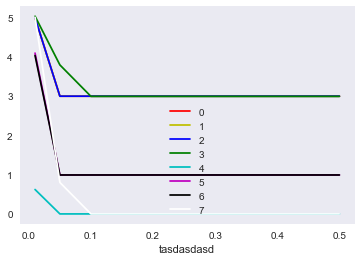

In [264]:
b = np.matrix(b)
color = ['r', 'y', 'b', 'g', 'c', 'm', 'k', 'w']
for i in range(len(q)):
    plt.plot(small_delta_list[::-1], b[:, len(q) - i - 1], color[i], label=str(i))
#plt.plot(small_delta_list, b[:, 1], 'r', label=str(1))
plt.legend(loc='best')
plt.xlabel('tasdasdasd')
plt.grid()
plt.show()

matrix([[ 0.        ],
        [ 3.13672205],
        [ 5.00658164]])

In [260]:
small_delta_list[::-1]

array([ 0.5  ,  0.375,  0.25 ,  0.125,  0.   ])